In [ ]:
# install pycaret
!pip install pycaret

In [ ]:
# check installed version
import pycaret
pycaret.__version__

'3.0.4'

In [ ]:
# import pycaret classification
from pycaret.classification import *

In [ ]:
# mount google drive
from google.colab import drive
drive.mount("/content/gdrive")
drug_path = '/content/gdrive/MyDrive/Sem-I/CMPE-255 Data Mining/Assignments2/drug_detaset.csv'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# read data
import pandas as pd
drug_class = pd.read_csv(drug_path)

# check data
drug_class.shape

(200, 6)

In [ ]:
drug_class.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [ ]:
# create train data
data_train = drug_class.sample(frac=0.9)
data_train.shape

(180, 6)

In [ ]:
data_train.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
16,69,M,LOW,NORMAL,11.455,drugX
94,56,M,LOW,HIGH,15.015,DrugY
185,57,F,NORMAL,NORMAL,25.893,DrugY
198,23,M,NORMAL,NORMAL,14.020,drugX
152,55,M,NORMAL,NORMAL,7.261,drugX


In [ ]:
data_test = drug_class.drop(data_train.index)
data_test.shape

(20, 6)

In [ ]:
data_test.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
4,61,F,LOW,HIGH,18.043,DrugY
7,41,M,LOW,HIGH,11.037,drugC
12,43,M,LOW,HIGH,15.376,DrugY


In [ ]:
data_train.reset_index(drop=True, inplace=True)
data_train.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,69,M,LOW,NORMAL,11.455,drugX
1,56,M,LOW,HIGH,15.015,DrugY
2,57,F,NORMAL,NORMAL,25.893,DrugY
3,23,M,NORMAL,NORMAL,14.020,drugX
4,55,M,NORMAL,NORMAL,7.261,drugX


In [ ]:
data_test.reset_index(drop=True, inplace=True)
data_test.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,47,M,LOW,HIGH,13.093,drugC
1,47,M,LOW,HIGH,10.114,drugC
2,61,F,LOW,HIGH,18.043,DrugY
3,41,M,LOW,HIGH,11.037,drugC
4,43,M,LOW,HIGH,15.376,DrugY


In [ ]:
s = setup(data_train, target = 'Drug')

,Description,Value
0,Session id,7366
1,Target,Drug
2,Target type,Multiclass
3,Target mapping,"DrugY: 0, drugA: 1, drugB: 2, drugC: 3, drugX: 4"
4,Original data shape,"(180, 6)"
5,Transformed data shape,"(180, 8)"
6,Transformed train set shape,"(125, 8)"
7,Transformed test set shape,"(55, 8)"
8,Ordinal features,2
9,Numeric features,2


In [ ]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9923,0.8000,0.9923,0.9949,0.9918,0.9892,0.9899,0.2800
rf,Random Forest Classifier,0.9923,0.8000,0.9923,0.9949,0.9918,0.9892,0.9899,0.5290
gbc,Gradient Boosting Classifier,0.9923,0.8000,0.9923,0.9949,0.9918,0.9892,0.9899,1.1410
xgboost,Extreme Gradient Boosting,0.9923,0.8000,0.9923,0.9949,0.9918,0.9892,0.9899,0.2740
lightgbm,Light Gradient Boosting Machine,0.9923,0.8000,0.9923,0.9949,0.9918,0.9892,0.9899,0.7620
lr,Logistic Regression,0.9763,0.7991,0.9763,0.9764,0.9729,0.9660,0.9685,1.7500
et,Extra Trees Classifier,0.9103,0.7971,0.9103,0.9076,0.9005,0.8667,0.8765,0.5740
ridge,Ridge Classifier,0.8865,0.0000,0.8865,0.8697,0.8678,0.8316,0.8450,0.5510
ada,Ada Boost Classifier,0.8481,0.7702,0.8481,0.7493,0.7887,0.7738,0.7901,0.6010
lda,Linear Discriminant Analysis,0.8321,0.7952,0.8321,0.8720,0.8156,0.7705,0.7957,0.3890


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

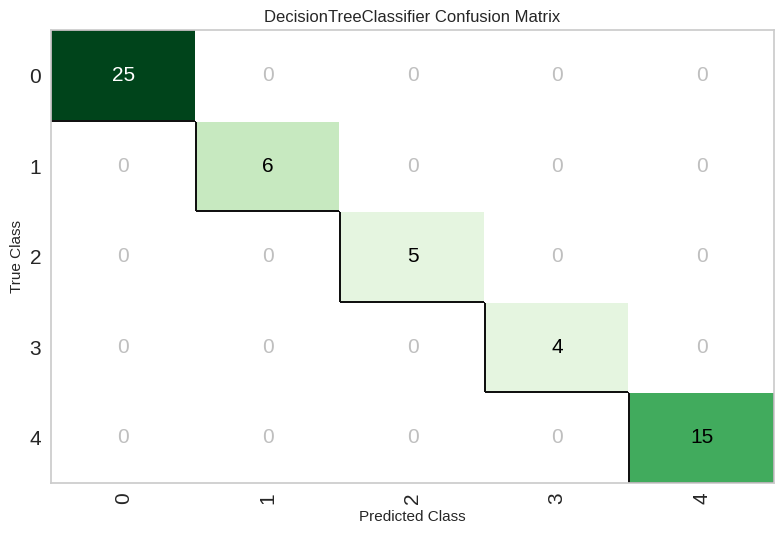

In [ ]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

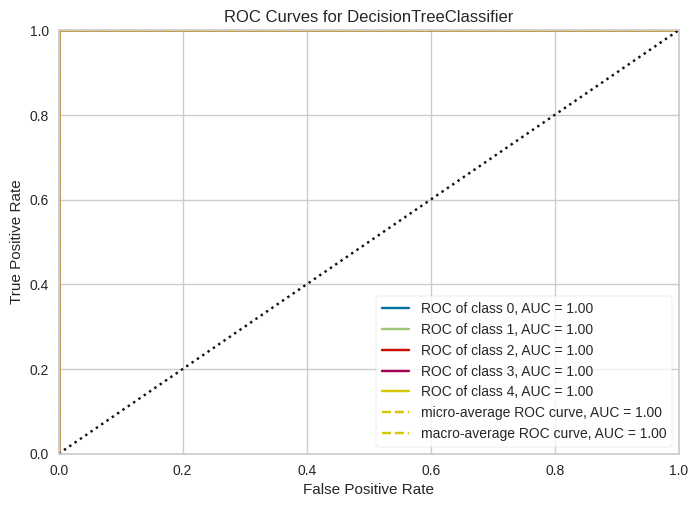

In [ ]:
# plot AUC
plot_model(best, plot = 'auc')

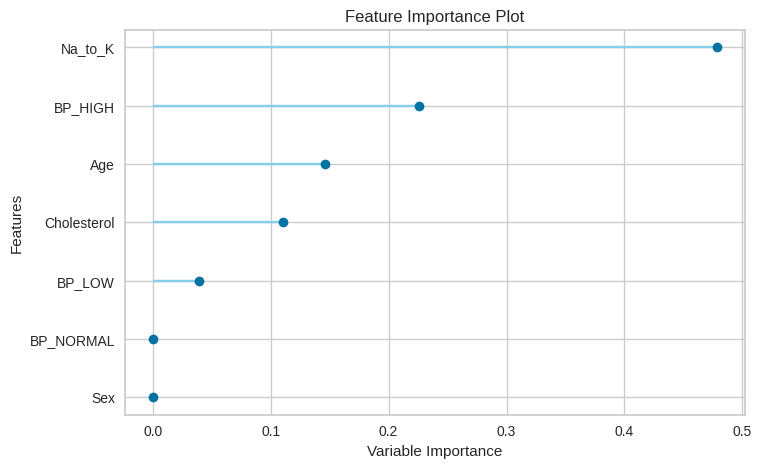

In [ ]:
# plot feature importance
plot_model(best, plot = 'feature')

In [ ]:
rf_classifier = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9231,0.0000,0.9231,0.9487,0.9179,0.8917,0.8992
5,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
print(rf_classifier)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=7366, verbose=0, warm_start=False)


In [ ]:
tuned_rf_classifier=tune_model(rf_classifier)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9231,0.0000,0.9231,0.9487,0.9179,0.8917,0.8992
5,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
print(tuned_rf_classifier)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=7366, verbose=0, warm_start=False)


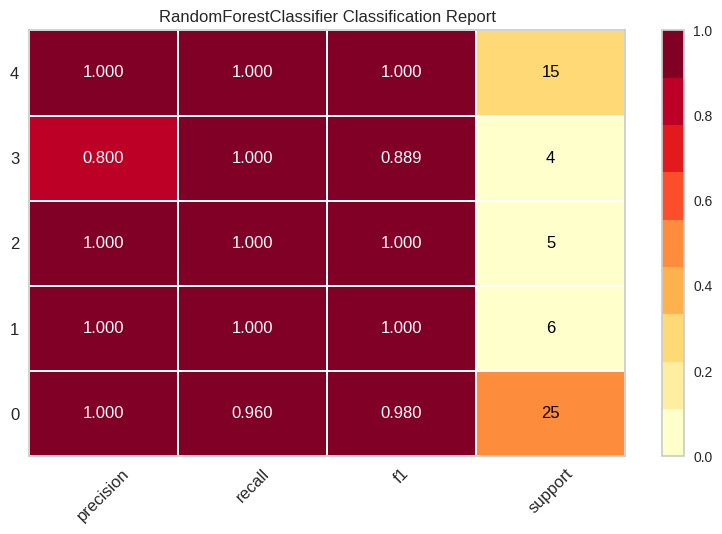

In [ ]:
plot_model(tuned_rf_classifier, plot="class_report")

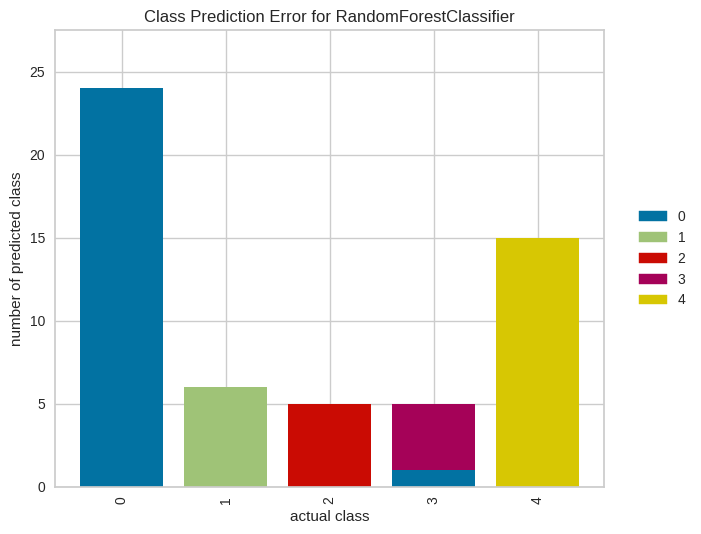

In [ ]:
plot_model(tuned_rf_classifier, plot="error")

In [ ]:
evaluate_model(tuned_rf_classifier)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
# save pipeline
final_rf = finalize_model(tuned_rf_classifier)
print(final_rf)

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None, include=['Age', 'Na_to_K'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='sqrt',
                  

In [ ]:
test_prediction = predict_model(final_rf, data=data_test)
test_prediction.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,1.0000,0,1.0000,1.0000,1.0000,1.0000,1.0000


,Age,Sex,BP,Cholesterol,Na_to_K,Drug,prediction_label,prediction_score
0,47,M,LOW,HIGH,13.093000,3,drugC,0.74
1,47,M,LOW,HIGH,10.114000,3,drugC,0.82
2,61,F,LOW,HIGH,18.042999,0,DrugY,0.92
3,41,M,LOW,HIGH,11.037000,3,drugC,0.70
4,43,M,LOW,HIGH,15.376000,0,DrugY,0.97
